# Практическое задание 

## Урок 4. Uplift-моделирование

### 1. скачать набор данных маркетинговых кампаний отсюда https://www.kaggle.com/davinwijaya/customer-retention

In [1]:
import pandas as pd

df = pd.read_csv("data.csv")
df

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,Discount,0
63996,5,38.91,0,1,Urban,1,Phone,Discount,0
63997,6,29.99,1,0,Urban,1,Phone,Discount,0
63998,1,552.94,1,0,Surburban,1,Multichannel,Buy One Get One,0


### 2. там поле conversion - это целевая переменная, а offer - коммуникация. Переименовать поля (conversion -> target, offer -> treatment) и привести поле treatment к бинарному виду (1 или 0, т.е было какое-то предложение или нет) - значение No Offer означает отсутствие коммуникации, а все остальные - наличие.

In [2]:
df.rename(columns = {'conversion':'target', 'offer':'treatment'}, inplace = True )
df

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,treatment,target
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,Discount,0
63996,5,38.91,0,1,Urban,1,Phone,Discount,0
63997,6,29.99,1,0,Urban,1,Phone,Discount,0
63998,1,552.94,1,0,Surburban,1,Multichannel,Buy One Get One,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recency        64000 non-null  int64  
 1   history        64000 non-null  float64
 2   used_discount  64000 non-null  int64  
 3   used_bogo      64000 non-null  int64  
 4   zip_code       64000 non-null  object 
 5   is_referral    64000 non-null  int64  
 6   channel        64000 non-null  object 
 7   treatment      64000 non-null  object 
 8   target         64000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 4.4+ MB


In [4]:
df['treatment'].unique()

array(['Buy One Get One', 'No Offer', 'Discount'], dtype=object)

In [5]:
df = df.replace({'treatment':{'No Offer':0, 'Buy One Get One':1, 'Discount':1}})
df

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,treatment,target
0,10,142.44,1,0,Surburban,0,Phone,1,0
1,6,329.08,1,1,Rural,1,Web,0,0
2,7,180.65,0,1,Surburban,1,Web,1,0
3,9,675.83,1,0,Rural,1,Web,1,0
4,2,45.34,1,0,Urban,0,Web,1,0
...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,1,0
63996,5,38.91,0,1,Urban,1,Phone,1,0
63997,6,29.99,1,0,Urban,1,Phone,1,0
63998,1,552.94,1,0,Surburban,1,Multichannel,1,0


In [6]:
df['treatment'].unique()

array([1, 0], dtype=int64)

In [7]:
df['treatment'].value_counts()

1    42694
0    21306
Name: treatment, dtype: int64

### 3. сделать feature engineering на ваше усмотрение (допускается свобода выбора методов)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recency        64000 non-null  int64  
 1   history        64000 non-null  float64
 2   used_discount  64000 non-null  int64  
 3   used_bogo      64000 non-null  int64  
 4   zip_code       64000 non-null  object 
 5   is_referral    64000 non-null  int64  
 6   channel        64000 non-null  object 
 7   treatment      64000 non-null  int64  
 8   target         64000 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 4.4+ MB


In [9]:
df['zip_code'].value_counts()

Surburban    28776
Urban        25661
Rural         9563
Name: zip_code, dtype: int64

In [10]:
df['channel'].value_counts()

Web             28217
Phone           28021
Multichannel     7762
Name: channel, dtype: int64

In [11]:
df['zip_code'] = df['zip_code'].astype('category')
df['channel'] = df['channel'].astype('category')
df = pd.get_dummies(df, columns=["zip_code",'channel'])
df

,recency,history,used_discount,used_bogo,is_referral,treatment,target,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web
0,10,142.44,1,0,0,1,0,0,1,0,0,1,0
1,6,329.08,1,1,1,0,0,1,0,0,0,0,1
2,7,180.65,0,1,1,1,0,0,1,0,0,0,1
3,9,675.83,1,0,1,1,0,1,0,0,0,0,1
4,2,45.34,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,0,1,0,0,0,1,0,0,1
63996,5,38.91,0,1,1,1,0,0,0,1,0,1,0
63997,6,29.99,1,0,1,1,0,0,0,1,0,1,0
63998,1,552.94,1,0,1,1,0,0,1,0,1,0,0


In [12]:
df['history'].describe()

count    64000.000000
mean       242.085656
std        256.158608
min         29.990000
25%         64.660000
50%        158.110000
75%        325.657500
max       3345.930000
Name: history, dtype: float64

### 4. сделать разбиение набора данных не тренировочную и тестовую выборки

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
features = ['recency', 'history', 'used_discount', 'used_bogo', 'zip_code', 'is_referral', 'channel']
treatment = 'treatment'
target = 'target'

indices_train, indices_test = train_test_split(df.index, test_size=0.3, random_state=0)

In [10]:
X_train = df.loc[indices_train, features]
y_train = df.loc[indices_train, target]
treat_train = df.loc[indices_train, treatment]

X_test = df.loc[indices_test, features]
y_test = df.loc[indices_test, target]
treat_test = df.loc[indices_test, treatment]

models_results = {
    'approach': [],
    'uplift@10%': [],
    'uplift@20%': []
}

cat_features = ['zip_code', 'channel']

In [11]:
X_train

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel
26161,1,571.68,0,1,Surburban,1,Phone
10495,12,61.40,1,0,Urban,0,Web
50047,3,465.79,0,1,Surburban,0,Web
56688,7,222.17,1,1,Surburban,0,Web
62760,4,442.70,1,0,Surburban,1,Web
...,...,...,...,...,...,...,...
45891,9,34.26,1,0,Urban,0,Phone
52416,5,264.71,1,1,Urban,0,Multichannel
42613,12,419.44,0,1,Urban,1,Multichannel
43567,1,331.56,0,1,Urban,0,Multichannel


In [12]:
y_train

26161    0
10495    0
50047    0
56688    1
62760    0
        ..
45891    0
52416    1
42613    1
43567    0
2732     0
Name: target, Length: 44800, dtype: int64

In [13]:
treat_train

26161    1
10495    1
50047    1
56688    0
62760    1
        ..
45891    0
52416    1
42613    1
43567    1
2732     1
Name: treatment, Length: 44800, dtype: int64

In [14]:
X_test

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel
11277,3,466.66,0,1,Urban,1,Phone
55819,8,44.25,0,1,Urban,0,Phone
43223,10,370.84,0,1,Urban,0,Phone
1351,3,114.27,1,0,Urban,1,Web
9247,5,230.93,1,1,Surburban,0,Phone
...,...,...,...,...,...,...,...
1831,6,138.55,1,0,Rural,0,Phone
37166,10,348.24,0,1,Surburban,0,Multichannel
169,6,136.63,1,0,Urban,1,Web
6977,1,76.21,1,0,Urban,0,Web


In [15]:
y_test

11277    1
55819    0
43223    0
1351     0
9247     0
        ..
1831     0
37166    0
169      0
6977     0
10028    1
Name: target, Length: 19200, dtype: int64

In [16]:
treat_test

11277    1
55819    1
43223    1
1351     1
9247     0
        ..
1831     1
37166    1
169      1
6977     1
10028    1
Name: treatment, Length: 19200, dtype: int64

### 5. провести uplift-моделирование 3 способами: одна модель с признаком коммуникации (S learner), модель с трансформацией таргета (трансформация классов п. 2. 1) и вариант с двумя независимыми моделями

In [17]:
from sklift.metrics import uplift_at_k
from sklift.viz import plot_uplift_preds
from sklift.models import SoloModel

from catboost import CatBoostClassifier

from sklearn.model_selection import cross_val_score, RandomizedSearchCV

import numpy as np

###  одна модель с признаком коммуникации (S learner)

In [18]:
sm = SoloModel(CatBoostClassifier(iterations=30, thread_count=2, random_state=42, silent=True))
sm = sm.fit(X_train, y_train, treat_train, estimator_fit_params={'cat_features': cat_features})

uplift_sm = sm.predict(X_test)

In [19]:
uplift_sm 

array([0.06795308, 0.07559067, 0.08479863, ..., 0.03413508, 0.04574834,
       0.062928  ])

In [20]:
sm_score_10 = uplift_at_k(y_true=y_test, uplift=uplift_sm, treatment=treat_test, strategy='by_group', k=0.1)
sm_score_10

0.08042449814601713

In [21]:
sm_score_20 = uplift_at_k(y_true=y_test, uplift=uplift_sm, treatment=treat_test, strategy='by_group', k=0.2)
sm_score_20

0.08220535824013764

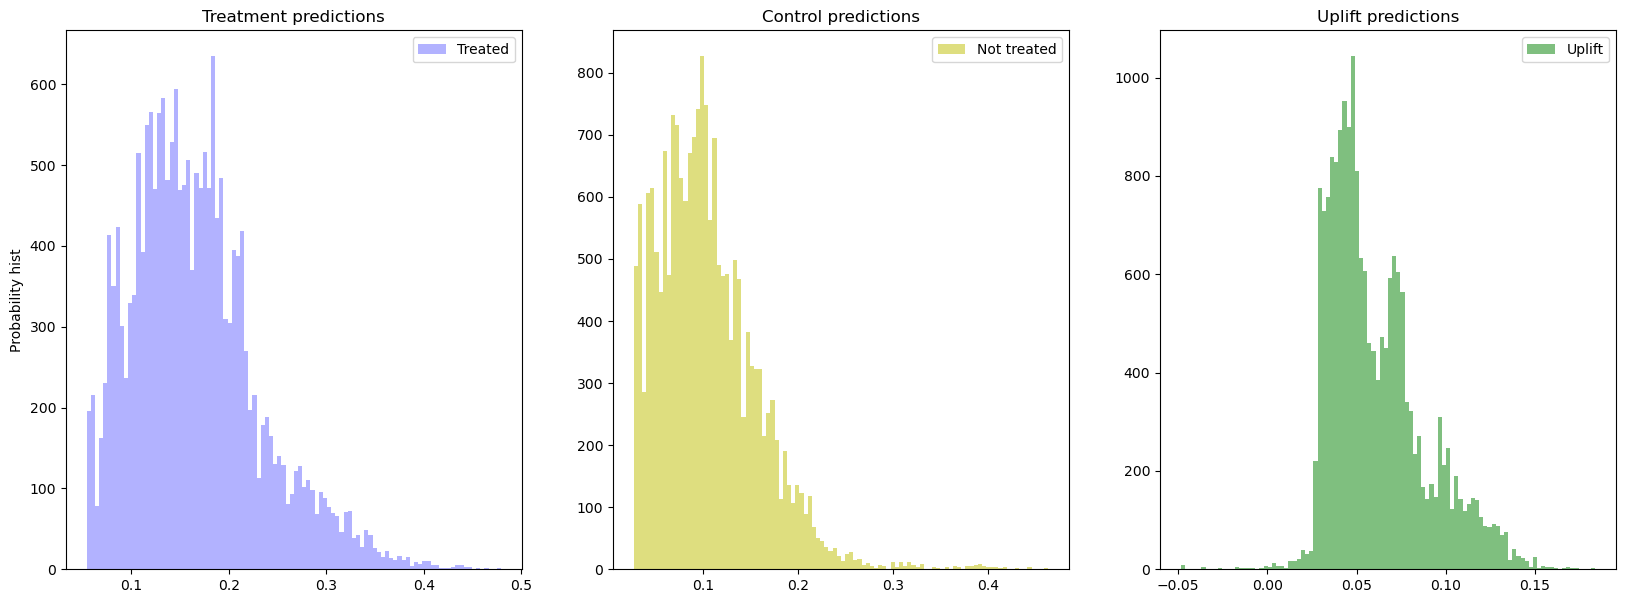

In [22]:
models_results['approach'].append('SoloModel')
models_results['uplift@10%'].append(sm_score_10)
models_results['uplift@20%'].append(sm_score_20)

# Получим условные вероятности выполнения целевого действия при взаимодействии для каждого объекта
sm_trmnt_preds = sm.trmnt_preds_
# И условные вероятности выполнения целевого действия без взаимодействия для каждого объекта
sm_ctrl_preds = sm.ctrl_preds_

# Отрисуем распределения вероятностей и их разность (uplift)
plot_uplift_preds(trmnt_preds=sm_trmnt_preds, ctrl_preds=sm_ctrl_preds);

In [23]:
# С той же легкостью можно обратиться к обученной модели.
# Например, чтобы построить важность признаков:
sm_fi = pd.DataFrame({
    'feature_name': sm.estimator.feature_names_,
    'feature_score': sm.estimator.feature_importances_
}).sort_values('feature_score', ascending=False).reset_index(drop=True)

sm_fi

,feature_name,feature_score
0,treatment,16.978381
1,is_referral,16.806655
2,used_bogo,12.418804
3,zip_code,12.269754
4,recency,12.056261
5,used_discount,11.141502
6,history,10.568532
7,channel,7.760111


### модель с трансформацией таргета

In [24]:
from sklift.models import ClassTransformation


ct = ClassTransformation(CatBoostClassifier(n_estimators=600, max_depth=2, cat_features=cat_features, random_state=0, silent=True))
ct = ct.fit(X_train, y_train, treat_train)

uplift_ct = ct.predict(X_test)

ct_score_10 = uplift_at_k(y_true=y_test, uplift=uplift_ct, treatment=treat_test, strategy='by_group', k=0.1)
ct_score_20 = uplift_at_k(y_true=y_test, uplift=uplift_ct, treatment=treat_test, strategy='by_group', k=0.2)

models_results['approach'].append('ClassTransformation')
models_results['uplift@10%'].append(ct_score_10)
models_results['uplift@20%'].append(ct_score_20)

In [25]:
ct_score_10

0.07686406420583636

In [26]:
ct_score_20

0.06807883740936463

важность признаков 

In [27]:
ct_fi = pd.DataFrame({
    'feature_name': ct.estimator.feature_names_,
    'feature_score': ct.estimator.feature_importances_
}).sort_values('feature_score', ascending=False).reset_index(drop=True)

ct_fi

,feature_name,feature_score
0,history,36.358527
1,used_bogo,17.243842
2,zip_code,11.650731
3,channel,10.272304
4,recency,9.698686
5,used_discount,8.271899
6,is_referral,6.504012


### вариант с двумя независимыми моделями

In [28]:
from sklift.models import TwoModels


tm = TwoModels(
    estimator_trmnt=CatBoostClassifier(n_estimators=600, max_depth=2, cat_features=cat_features, random_state=0, silent=True), 
    estimator_ctrl=CatBoostClassifier(n_estimators=600, max_depth=2, cat_features=cat_features, random_state=0, silent=True), 
    method='vanilla'
)
tm = tm.fit(X_train, y_train, treat_train)

uplift_tm = tm.predict(X_test)

In [29]:
tm_score_10 = uplift_at_k(y_true=y_test, uplift=uplift_tm, treatment=treat_test, strategy='by_group', k=0.1)
tm_score_10

0.08575039587697814

In [30]:
tm_score_20 = uplift_at_k(y_true=y_test, uplift=uplift_tm, treatment=treat_test, strategy='by_group', k=0.2)
tm_score_20

0.08177368809143418

array([<Axes: title={'center': 'Treatment predictions'}, ylabel='Probability hist'>,
       <Axes: title={'center': 'Control predictions'}>,
       <Axes: title={'center': 'Uplift predictions'}>], dtype=object)

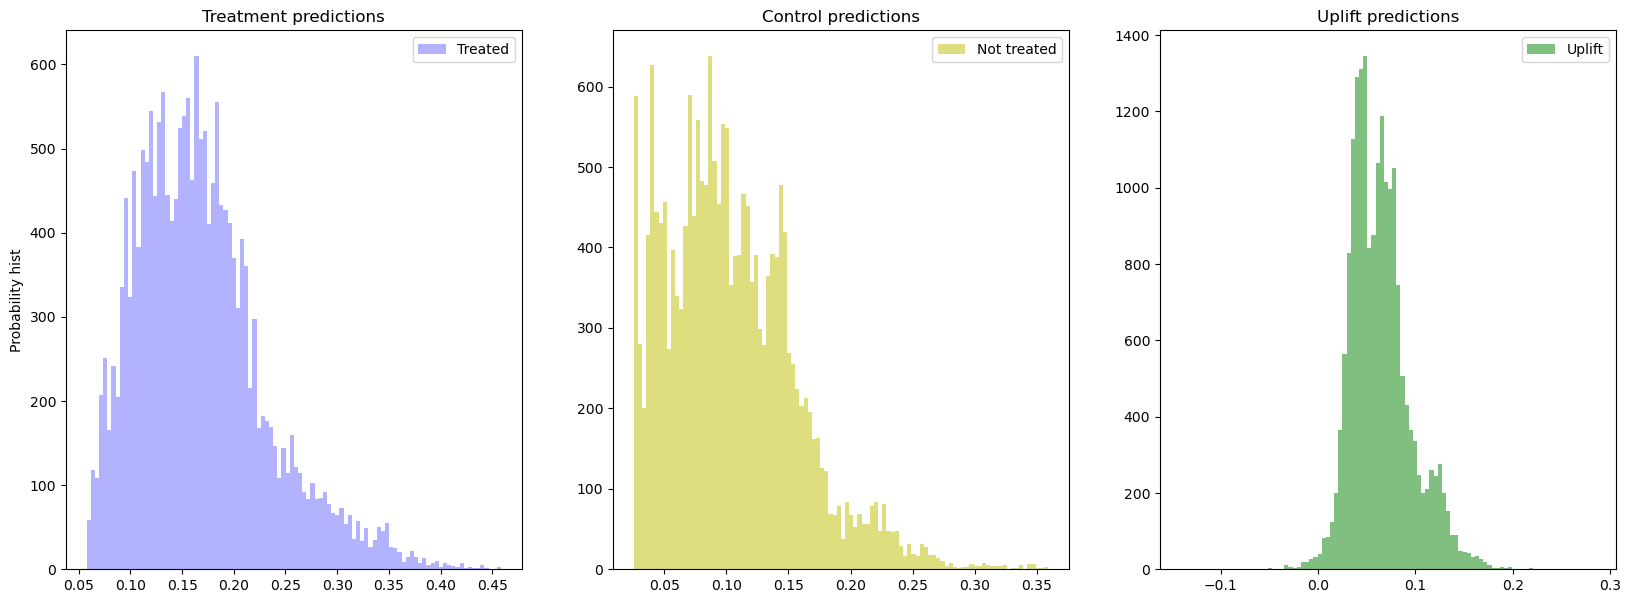

In [31]:
models_results['approach'].append('TwoModels')
models_results['uplift@10%'].append(tm_score_10)
models_results['uplift@20%'].append(tm_score_20)

plot_uplift_preds(trmnt_preds=tm.trmnt_preds_, ctrl_preds=tm.ctrl_preds_)

In [32]:
# важность признаков - основная группа 
tm_fi_trmnt = pd.DataFrame({
    'feature_name': tm.estimator_trmnt.feature_names_,
    'feature_score': tm.estimator_trmnt.feature_importances_
}).sort_values('feature_score', ascending=False).reset_index(drop=True)

tm_fi_trmnt

,feature_name,feature_score
0,used_bogo,23.475454
1,is_referral,19.255363
2,history,18.865121
3,recency,14.579694
4,used_discount,12.412655
5,zip_code,7.624304
6,channel,3.787408


In [33]:
# важность признаков - контрольная группа 
tm_fi_ctrl = pd.DataFrame({
    'feature_name': tm.estimator_ctrl.feature_names_,
    'feature_score': tm.estimator_ctrl.feature_importances_
}).sort_values('feature_score', ascending=False).reset_index(drop=True)

tm_fi_ctrl

,feature_name,feature_score
0,is_referral,29.159355
1,recency,23.743634
2,history,18.708625
3,zip_code,12.998248
4,channel,6.432242
5,used_bogo,4.506640
6,used_discount,4.451256


### 6. в конце вывести единую таблицу сравнения метрик uplift@10%, uplift@20% этих 3 моделей

In [34]:
data_compare_metrics = pd.DataFrame(data=models_results).sort_values('uplift@10%', ascending=False)
data_compare_metrics

,approach,uplift@10%,uplift@20%
2,TwoModels,0.085750,0.081774
0,SoloModel,0.080424,0.082205
1,ClassTransformation,0.076864,0.068079
